Task 8: Random Forest vs Decision Tree ● Train a RandomForestClassifier on the same dataset used for Task 5. ● Compare accuracy, precision, and recall with the standalone decision tree. ● Plot feature importances.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 

In [2]:
# Load and Preprocess Titanic Dataset:-

data = pd.read_csv('titanic.csv')

data=data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'],axis=1)

data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])          
data['Embarked'] = le.fit_transform(data['Embarked']) 

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [3]:
 
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))

Decision Tree Metrics:
Accuracy: 0.7821229050279329
Precision: 0.7215189873417721
Recall: 0.7702702702702703

Random Forest Metrics:
Accuracy: 0.8212290502793296
Precision: 0.8088235294117647
Recall: 0.7432432432432432


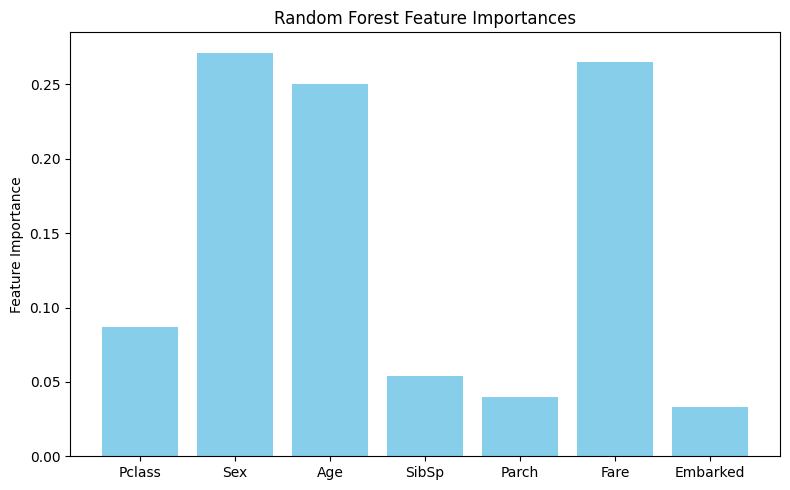

In [4]:
# Plot feature importances from Random Forest
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.bar(features, importances, color='skyblue')
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()